# Machine Learning Practice Case

# Pre-Processing Phase

In [1]:
import pandas as pd

In [2]:
#read the dataset
data = pd.read_csv('ML_2_Fellow_.csv')

#data overview
data.head()

,Kode_Bayar,Kode_Barang,Barang,Jumlah,Tanggal_Transaksi,Harga_Satuan,Kode_Pelanggan,Negara
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
#check the data summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Kode_Bayar         541909 non-null  object 
 1   Kode_Barang        535874 non-null  object 
 2   Barang             534420 non-null  object 
 3   Jumlah             535874 non-null  float64
 4   Tanggal_Transaksi  535874 non-null  object 
 5   Harga_Satuan       535874 non-null  float64
 6   Kode_Pelanggan     403182 non-null  float64
 7   Negara             535874 non-null  object 
dtypes: float64(3), object(5)
memory usage: 33.1+ MB


In [4]:
#change teh dataype of 'Kode_Pelanggan' into objek(str)
#because ID its only symbol.

data['Kode_Pelanggan'] = data['Kode_Pelanggan'].astype('str')

In [5]:
#detele 'Tanggal_Transaksi', unused columnn.
data = data.drop(['Tanggal_Transaksi'], axis=1)

In [6]:
#inspecting missing values in each column
data.isnull().sum()

Kode_Bayar           0
Kode_Barang       6035
Barang            7489
Jumlah            6035
Harga_Satuan      6035
Kode_Pelanggan       0
Negara            6035
dtype: int64

In [7]:
#check dataset distribution
data.describe()

,Jumlah,Harga_Satuan
count,535874.000000,535874.000000
mean,9.587927,4.636533
std,153.292222,97.302232
min,-74215.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,74215.000000,38970.000000


In [8]:
#from data describe, i found negatif value in column 'Jumlah' and 'Harga_Sutuan'
#even though there shouldn't be. Because 'Jumlah' and 'Harga_Satuan' are include to Rasio data type.
#So there shouldn't ne negatif values
#I will change the value onto positif value. 

In [9]:
data['Jumlah'] = abs(data['Jumlah'])
data['Harga_Satuan'] = abs(data['Harga_Satuan'])

In [10]:
#checking the values
data.describe()

#the min data is 1.000, so there no negatif values anymore. 

,Jumlah,Harga_Satuan
count,535874.000000,535874.000000
mean,11.015035,4.719105
std,153.196288,97.298263
min,1.000000,0.000000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,74215.000000,38970.000000


In [11]:
#make a function for inspecting duplicated data
def anydup(data):
    seen = set()
    for x in data:
        if x in seen: return True
        seen.add(x)
    return False

In [12]:
#inspecting duplicated data in each column
anydup(data)

False

In [13]:
import matplotlib.pyplot as plt
import numpy as np

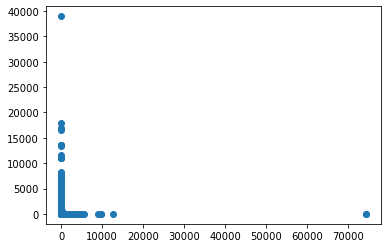

In [14]:
plt.scatter(data['Jumlah'], data['Harga_Satuan'])
plt.show()

In [15]:
#Because there is an outlier, i will use median to fill the missing value
#'Jumlah' column
data['Jumlah'] = data['Jumlah'].fillna(data['Jumlah'].median())

#'Harga_Satuan' column
data['Harga_Satuan'] = data['Harga_Satuan'].fillna(data['Harga_Satuan'].median())

In [16]:
#for categorical data, use mode to fill the missing values
#'Kode_Barang' column
data['Kode_Barang'] = data['Kode_Barang'].fillna(data['Kode_Barang'].mode()[0])

#'Barang' column
data['Barang'] = data['Barang'].fillna(data['Barang'].mode()[0])

#'Negara' column
data['Negara'] = data['Negara'].fillna(data['Negara'].mode()[0])

In [17]:
#re-inspecting missing values in each column
data.isnull().sum()

Kode_Bayar        0
Kode_Barang       0
Barang            0
Jumlah            0
Harga_Satuan      0
Kode_Pelanggan    0
Negara            0
dtype: int64

# Number 1

#Most item bought by customer
#Is there any item we should ignore?

In [18]:
#Most item 
#make a subsest contains 'Barang', 'Jumlah' to count the product
data_1 = data[['Barang', 'Jumlah']]
data_1 = data_1.groupby('Barang').agg(np.sum)

#sorting the data
data_1 = data_1.sort_values(by=['Jumlah'], ascending=False)

In [19]:
data_1.shape

(4113, 1)

In [20]:
#top 5 sold item.
data_1.head()

,Jumlah
Barang,
MEDIUM CERAMIC TOP STORAGE JAR,152527.0
WHITE HANGING HEART T-LIGHT HOLDER,137281.0
WORLD WAR 2 GLIDERS ASSTD DESIGNS,56247.0
JUMBO BAG RED RETROSPOT,49593.0
POPCORN HOLDER,37188.0


In [21]:
#data that should be ignored
x = data_1[data_1['Jumlah']<2]
x

,Jumlah
Barang,
FILIGREE DIAMANTE CHAIN,1.0
SWEETHEART KEY CABINET,1.0
ETCHED GLASS STAR TREE DECORATION,1.0
CAKE STAND LACE WHITE,1.0
BLUE CRYSTAL BOOT PHONE CHARM,1.0
...,...
SET 36 COLOURING PENCILS DOILEY,1.0
FLOWER SHOP DESIGN MUG,1.0
MARIE ANTOIENETT TRINKET BOX GOLD,1.0


In [22]:
#selling composition
#comparing bertween top 100 product with the others.
top1_p_top2 = data_1['Jumlah'][:2].sum(axis=0)
print(top1_p_top2)

289808.0


In [23]:
others = data_1['Jumlah'][2:].sum(axis=0)
print(others)

5630968.0


In [24]:
#almost a half of product sold is MEDIUM CERAMIC TOP STORAGE JAR and WHITE HANGING HEART T-LIGHT HOLDER

# Number 2

#Strategy to increase sales based on export destinations country

In [25]:
#make a subset data include 'Negara', 'Jumlah', 'Harga_Satuan'
data_2 = data[['Negara', 'Jumlah', 'Harga_Satuan']]

In [26]:
#add new column name 'Total' by muliplate 'Jumlah' and 'Harga_Satuan'
for i, item in data_2.items():
    item = data_2['Jumlah']*data_2['Harga_Satuan']
    data_2['Total'] = item

data_2

<ipython-input-26-ccb993b4ff19>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2['Total'] = item


,Negara,Jumlah,Harga_Satuan,Total
0,United Kingdom,6.0,2.55,15.30
1,United Kingdom,6.0,3.39,20.34
2,United Kingdom,8.0,2.75,22.00
3,United Kingdom,6.0,3.39,20.34
4,United Kingdom,6.0,3.39,20.34
...,...,...,...,...
541904,France,12.0,0.85,10.20
541905,France,6.0,2.10,12.60
541906,France,4.0,4.15,16.60
541907,France,4.0,4.15,16.60


In [27]:
#group by data to got insight about coutry with higher product sales
#delete 'Harga_Satuan' column, unused data, because the values is already include in total.
data_2 = data_2.drop(['Harga_Satuan'], axis=1)
data_2 = data_2.groupby('Negara').agg(np.sum)
data_2 = data_2.sort_values(by=['Total'], ascending=False)

data_2

,Jumlah,Total
Negara,,
United Kingdom,4988290.0,9.504673e+06
EIRE,150105.0,3.019820e+05
Netherlands,199958.0,2.848087e+05
Germany,120446.0,2.350605e+05
France,113337.0,2.216930e+05
Australia,82725.0,1.381818e+05
Spain,28839.0,6.822232e+04
Switzerland,30771.0,5.757293e+04
Belgium,23264.0,4.129974e+04


In [28]:
#by choose UK as first priority on export the product
#give a special treatment to make them loyal to our product, like discount, bonuses, etc.
#also optimalize product sales on top 4 country behind UK. EIRE, Nedthh, Germany, France
#if it possible, try to optimalize product sales in country with high 'Total' but small 'Jumlah' like Singapore and Hongkong
## its mean, they didn't bought a lot of product but, thet bought 'an expensive' product or product with high 'Harga_Satuan'

# Number 3

#Customer Segmentation

## Using K-Mean

In [29]:
#create a subsest
data_3 = data[['Jumlah', 'Harga_Satuan', 'Negara']]

In [30]:
#add new column name 'Total' by muliplate 'Jumlah' and 'Harga_Satuan'
for i, item in data_3.items():
    item = data_3['Jumlah']*data_3['Harga_Satuan']
    data_3['Total'] = item

<ipython-input-30-6ff1c01e3ce0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_3['Total'] = item


In [31]:
#data overview
data_3.head()

,Jumlah,Harga_Satuan,Negara,Total
0,6.0,2.55,United Kingdom,15.30
1,6.0,3.39,United Kingdom,20.34
2,8.0,2.75,United Kingdom,22.00
3,6.0,3.39,United Kingdom,20.34
4,6.0,3.39,United Kingdom,20.34


In [32]:
#Fisrt, i will gorup the data by 'Negara'. also drop 'Barang' column.

data_3 = data_3.groupby('Negara').agg(np.sum)
data_3 = data_3.reset_index()
data_3

,Negara,Jumlah,Harga_Satuan,Total
0,Australia,82725.0,4.043010e+03,1.381818e+05
1,Austria,4917.0,1.698550e+03,1.022270e+04
2,Bahrain,368.0,8.657000e+01,9.598800e+02
3,Belgium,23264.0,7.491940e+03,4.129974e+04
4,Brazil,356.0,1.426000e+02,1.143600e+03
5,Canada,2725.0,9.037800e+02,3.599680e+03
6,Channel Islands,9432.0,3.716460e+03,2.067034e+04
7,Cyprus,6311.0,3.906240e+03,1.407949e+04
8,Czech Republic,750.0,8.815000e+01,9.457600e+02
9,Denmark,8210.0,1.260710e+03,1.903958e+04


In [33]:
#subset the numerical data
data_3_temp = data_3.copy()
data_3 = data_3[['Jumlah', 'Harga_Satuan', 'Total']] 
data_3.head()

,Jumlah,Harga_Satuan,Total
0,82725.0,4043.01,138181.79
1,4917.0,1698.55,10222.70
2,368.0,86.57,959.88
3,23264.0,7491.94,41299.74
4,356.0,142.60,1143.60


In [34]:
#random cluster 4
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=4, max_iter=300, random_state=42)

In [35]:
#fit model
kmeans.fit(data_3)

KMeans(init='random', n_clusters=4, random_state=42)

In [36]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[3.29947500e+04, 6.63065625e+03, 5.73655025e+04],
       [4.98829000e+06, 2.28890359e+06, 9.50467347e+06],
       [3.38728000e+03, 2.56253480e+03, 8.44779240e+03],
       [1.45961500e+05, 3.38466000e+04, 2.60886032e+05]])

In [37]:
#number of iterations
kmeans.n_iter_

2

In [38]:
#predicted class
kmeans.labels_[:20]

array([0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2])

In [39]:
#adding 'Kluster' colmn for kluster in each data
data_3_temp['Kluster'] = kmeans.labels_
data_3_temp.head()

,Negara,Jumlah,Harga_Satuan,Total,Kluster
0,Australia,82725.0,4043.01,138181.79,0
1,Austria,4917.0,1698.55,10222.70,2
2,Bahrain,368.0,86.57,959.88,2
3,Belgium,23264.0,7491.94,41299.74,0
4,Brazil,356.0,142.60,1143.60,2


In [40]:
#testing accucary score with davies_bouldin_score
from sklearn.metrics import davies_bouldin_score 
labels = kmeans.labels_ 
print(davies_bouldin_score(data_3, labels)) 

0.39679798398507055


In [41]:
#try 5 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=5,n_init=10, max_iter=300, random_state=42)
kmeans.fit(data_3)
labels = kmeans.labels_ 
print(davies_bouldin_score(data_3, labels)) 

0.34201015596132267


In [42]:
#try 7 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=7,n_init=10, max_iter=300, random_state=42)
kmeans.fit(data_3)
labels = kmeans.labels_ 
print(davies_bouldin_score(data_3, labels)) 

0.46177019626911064


In [43]:
#try 8 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=8,n_init=10, max_iter=300, random_state=42)
kmeans.fit(data_3)
labels = kmeans.labels_ 
print(davies_bouldin_score(data_3, labels)) 

0.4579673122663198


In [44]:
#try 6 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=6,n_init=10, max_iter=300, random_state=42)
kmeans.fit(data_3)
labels = kmeans.labels_ 
print(davies_bouldin_score(data_3, labels)) 

0.4330651495543832


In [45]:
#try 3 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3,n_init=10, max_iter=300, random_state=42)
kmeans.fit(data_3)
labels = kmeans.labels_ 
print(davies_bouldin_score(data_3, labels)) 

0.21373238582097445


In [46]:
#MODEL WITH THE BEST ACCURACY IS using 3 clusters
data_3_temp['Kluster'] = labels
data_3_temp

,Negara,Jumlah,Harga_Satuan,Total,Kluster
0,Australia,82725.0,4.043010e+03,1.381818e+05,0
1,Austria,4917.0,1.698550e+03,1.022270e+04,2
2,Bahrain,368.0,8.657000e+01,9.598800e+02,2
3,Belgium,23264.0,7.491940e+03,4.129974e+04,2
4,Brazil,356.0,1.426000e+02,1.143600e+03,2
5,Canada,2725.0,9.037800e+02,3.599680e+03,2
6,Channel Islands,9432.0,3.716460e+03,2.067034e+04,2
7,Cyprus,6311.0,3.906240e+03,1.407949e+04,2
8,Czech Republic,750.0,8.815000e+01,9.457600e+02,2
9,Denmark,8210.0,1.260710e+03,1.903958e+04,2


In [47]:
#sorting data
data_3_temp = data_3_temp.sort_values(by=['Kluster'], ascending=True)
data_3_temp

,Negara,Jumlah,Harga_Satuan,Total,Kluster
0,Australia,82725.0,4.043010e+03,1.381818e+05,0
24,Netherlands,199958.0,6.472410e+03,2.848087e+05,0
14,Germany,120446.0,3.757960e+04,2.350605e+05,0
13,France,113337.0,4.299335e+04,2.216930e+05,0
10,EIRE,150105.0,4.834104e+04,3.019820e+05,0
36,United Kingdom,4988290.0,2.288904e+06,9.504673e+06,1
22,Lithuania,652.0,9.944000e+01,1.661060e+03,2
23,Malta,984.0,6.658200e+02,2.943430e+03,2
25,Norway,19340.0,6.510870e+03,3.690819e+04,2
26,Poland,3711.0,1.417320e+03,7.436360e+03,2
